# MIE 1624 Course Project

## Group 18



## Import Libraries

In [2]:
!pip install bs4
!pip install nltk
!pip install wordcloud
!pip install matplotlib_venn
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib
import re
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import time
import json
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from collections import Counter
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib_venn import venn3,venn3_circles
from matplotlib import gridspec
import sys
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')

  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=0cdba8802387827399072d154e23904c94a169e02831583170157e6ef062b70d
  Stored in directory: C:\Users\wzzz0\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wzzz0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Project 1. Course Curriculum Design

## 1.Data Analysis and Visualization for 2019_Kaggle Dataset

In [3]:
kaggle = pd.read_csv("clean_kaggle_data.csv")

### 1.1 IDEs required for Business Analyst, Data Analyst, and Data Scientist

No handles with labels found to put in legend.


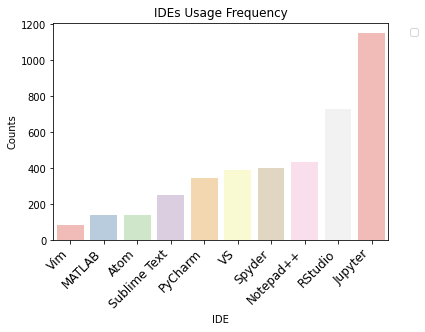

In [6]:
kaggle = kaggle[(kaggle['Q5'] == 'Business Analyst') | (kaggle['Q5'] == 'Data Analyst') | (kaggle['Q5'] == 'Data Scientst')]
ide = kaggle.loc[:, 'Q16_Part_1':'Q16_Part_10']
ide.columns = ['Jupyter', 'RStudio', 'PyCharm', 'Atom', 'MATLAB','VS','Spyder','Vim', 'Notepad++', 'Sublime Text']
ide = ide.notnull().astype('int')
ide_null = pd.DataFrame(index = list(range(10)), columns = ['IDE', 'Counts'])
ide_null = ide_null.fillna(0)

def summarize(df):
    l = []
    for col in df:
        l.append(df[col].sum())
    return l

ide_null['IDE'] = ide.columns
ide_null['Counts']=summarize(ide)
ide_null=ide_null.sort_values('Counts')
#ide_null['IDE'] = ide.columns

# Exploratory Data Analysis
ax = sns.barplot(x="IDE", y="Counts", data=ide_null , palette = 'Pastel1')
ax.set_title('IDEs Usage Frequency')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

We want to implement the use of Jupyter notebook/Jupyter Lab, RStudio, Spyder and Notepad++ into the curriculum. 

### 1.2 Collabration Method Used

No handles with labels found to put in legend.


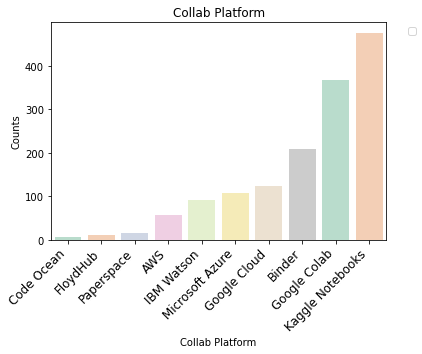

In [4]:
collab = kaggle.loc[:, 'Q17_Part_1':'Q17_Part_10']
collab.columns = ['Kaggle Notebooks', 'Google Colab', 'Microsoft Azure', 'Google Cloud', 'Paperspace','FloydHub','Binder','IBM Watson', 'Code Ocean', 'AWS']
collab = collab.notnull().astype('int')
collab_null = pd.DataFrame(index = list(range(10)), columns = ['Collab Platform', 'Counts'])
collab_null = collab_null.fillna(0)

collab_null['Collab Platform'] = collab.columns
collab_null['Counts']=summarize(collab)
collab_null=collab_null.sort_values('Counts')

# Exploratory Data Analysis
ax = sns.barplot(x="Collab Platform", y="Counts", data=collab_null , palette = 'Pastel2')
ax.set_title('Collab Platform')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

When designing group project, we can require students to use Kaggle Notebooks or Google Colab. 

### 1.3 Programming Language

In [5]:
language = kaggle.loc[:, 'Q19']

In [6]:
language = language.value_counts().rename_axis('Language').reset_index(name='counts')
print(language)

      Language  counts
0       Python    1181
1          SQL     234
2            R     225
3          C++      23
4        Other      20
5         None      18
6       MATLAB      15
7         Java       8
8            C       6
9   Javascript       6
10        Bash       3
11  TypeScript       1


No handles with labels found to put in legend.


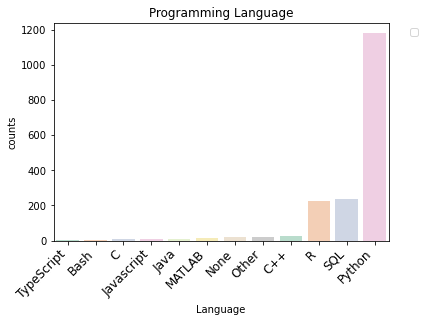

In [7]:
language=language.sort_values('counts')
# Exploratory Data Analysis
ax = sns.barplot(x="Language", y="counts", data=language , palette = 'Pastel2')
ax.set_title('Programming Language')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

### 1.4 Topics to learn

In [7]:
topics = kaggle.loc[:, 'Q24_Part_1':'Q24_Part_10']

In [8]:
topics.columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines', 'Bayesian Approaches', 'Evolutionary Approaches','Dense Neural Networks','Convolutional Neural Networks','Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks']
topics = topics.notnull().astype('int')
_null = pd.DataFrame(index = list(range(10)), columns = ['Topics', 'Counts'])
_null = _null.fillna(0)

_null['Topics'] = topics.columns
_null['Counts']=summarize(topics)
_null=_null.sort_values('Counts')


No handles with labels found to put in legend.


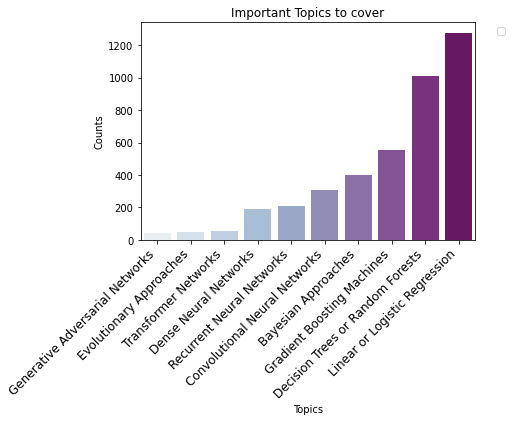

In [9]:
ax = sns.barplot(x="Topics", y="Counts", data=_null , palette = 'BuPu')
ax.set_title('Important Topics to cover')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conclusion:

- Based on the analysis result, Curriculum should include topics such as: Linear/Logistic Regression; Decision Trees/Random Forests; Gradient Boosting Machines; Bayesian Approaches; Convolutional Neural Networks.
- The most popular language is Python. 
- According to the analysis result, Group Project should be designed to collaborate on Kaggle Notebooks, or Google Collab, depending on which will allow university students to use for free. 
- And Primary IDE used in Class could include Jupyter Notebooks/Jupyter Lab/ or RStudio.


## 2. Web Scraping and Visualization on Linkedin

## 2.1 Web Scraping for Data Scientist

### Define the Skill Keyword List

In [11]:
# skill set list
skills_keywords = ['Python',' R,','Excel','Java','Scala','Matlab','SAS', 'SQL','SPSS', 'Tableau', 'Power BI', 'Machine Learning','Modeling','Deep learning','Data mining', 'NLP','Neural Networks','Visualization','Big data',  'Hadoop', 'Hive','Azure','Mathematics','Statistics','AWS cloud', 
                   'Presentation','Problem solving','Collaboration','Project management' ]     # R should be surrounded with space and character

### Get Linkedin urls

In [12]:
# def linkedin_url(url):
#     # get html 
#     html = requests.get(url)
#     html = html.text
#     soup = BeautifulSoup(html, 'lxml')

#     # add the common part between search pages
#     base_url = 'https://ca.linkedin.com/jobs/data-scientist-jobs?position=1&pageNum='
    
#     urls = []
#     for i in range(0, 2000, 25):
#         urls.append(base_url + str(i))
    
#     return urls

In [13]:
# url = "https://ca.linkedin.com/jobs/data-scientist-jobs"
# urls = linkedin_url(url)
# headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.3'}

### Get Job Information

In [14]:
# def job_info(url):
    
#     dic = {}
   
#     for page_url in url:                                         # loop over all page-urls
#         page = requests.get(page_url)
#         content = page.text
#         soup = BeautifulSoup(content, 'lxml')
#         x = soup.find_all('a',{'class':"result-card__full-card-link"})        # find all <div> tags containing each job posting links and feed them to the function

#         for job in x:
#             job_link = job['href']
#             job_page = requests.get(job_link)
#             job_content = job_page.text
#             dic[job_link] = job_content
            
#     return dic

In [15]:
# linkedin_dict = job_info(urls)

### Get Skill Information 

In [16]:
# def skills(job_set, skill_set):
#     results = {}   
#     # loop over all key(link)-value(HTML code) pairs in scraping results
#     for link, job_html_text in job_set.items(): 
#         soup_job = BeautifulSoup(job_html_text, 'lxml')
#         results[link] = {}       
#         try:
#             results[link]['job title'] = soup_job.find('h1',{'class':'topcard__title'}).text     # extract job title
#         except:
#             results[link]['job title'] = 'Not found'      
#         try:
#             results[link]['company name'] = soup_job.find('a',{'class':'topcard__org-name-link topcard__flavor--black-link'}).text      # extract company name
#         except:
#             results[link]['company name'] = 'Not found'
                
#         # search for the skills
#         job_text = soup_job.text
#         for  skill in skill_set:         
#              value = 0            
#              if job_text.lower().find(skill.lower()) != -1: 
#                 value = 1
#              results[link][skill] = value   
#     return results

In [17]:
# results =  skills(linkedin_dict, skills_keywords)
# df_linkedin = pd.DataFrame(results).T.reset_index()

In [18]:
# df_linkedin.to_csv('skills_linkedin.csv')

## 2.2 Data Visualization

In [13]:
skill_data = pd.read_csv('skills_linkedin.csv')
skill_data.drop(columns=['Unnamed: 0','index'],inplace=True)
skill_data.columns=['Job Title','Company Name','Python','R','Excel','Java','Scala','Matlab','SAS', 'SQL','SPSS', 'Tableau', 'Power BI', 'Machine Learning','Modeling','Deep learning','Data mining', 'NLP','Neural Networks','Visualization','Big data',  'Hadoop', 'Hive','Azure','Mathematics','Statistics','AWS cloud', 
                   'Presentation','Problem solving','Collaboration','Project management' ]
skill_data.head()

,Job Title,Company Name,Python,R,Excel,Java,Scala,Matlab,SAS,SQL,...,Hadoop,Hive,Azure,Mathematics,Statistics,AWS cloud,Presentation,Problem solving,Collaboration,Project management
0,Data Scientist - Montreal,AdGear,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Senior Data Scientist,Microsoft,1,0,1,0,0,0,1,1,...,1,0,1,1,1,0,0,0,1,0
2,Data Scientist,Not found,1,1,1,1,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0
3,Data Scientist (Decision Science),Compass Digital Labs,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,Data Scientist,Seaspan Corporation,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0


### Job Skills Count Plot on Linkedin

In [20]:
#define a function to get sum list
def summarize(df):
    l = []
    for col in df:
        l.append(df[col].sum())
    return l

skill=skill_data.iloc[:,2:]
skill.columns=['Python','R','Excel','Java','Scala','Matlab','SAS', 'SQL','SPSS', 'Tableau', 'Power BI', 'Machine Learning','Modeling','Deep learning','Data mining', 'NLP','Neural Networks','Visualization','Big data',  'Hadoop', 'Hive','Azure','Mathematics','Statistics','AWS cloud', 
                'Presentation','Problem solving','Collaboration','Project management' ]

skill_=pd.DataFrame(columns=['Skills','Counts'])
skill_=skill_.fillna(0)


No handles with labels found to put in legend.


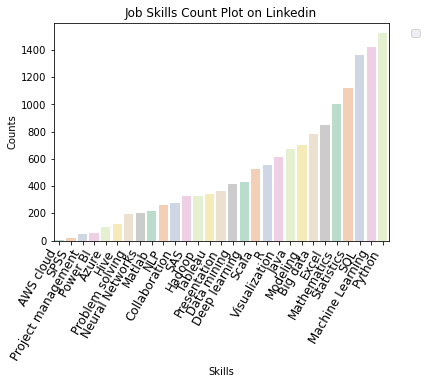

In [21]:
skill_['Skills']=skill.columns
skill_['Counts']=summarize(skill)
skill_=skill_.sort_values('Counts')
ax = sns.barplot(x="Skills", y="Counts", data=skill_ , palette = 'Pastel2')
ax.set_title('Job Skills Count Plot on Linkedin')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(13,9)})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [15]:
#define soft_skills and tech_skills lists

soft_skills = ['Presentation',  'Problem solving', 'Collaboration',  'Project management']

tech_skills = [ 'Python', 'R','Excel', 'Java', 'Scala', 'Matlab', 'SAS', 'SQL', 'SPSS', 'Machine Learning', 'Data mining', 'NLP', 'Visualization','Hive','Hadoop',
              'Big data', 'AWS cloud','Neural Networks',  'Azure', 'Mathematics','Statistics','Power BI','Tableau','Modeling','Deep learning']
df_soft = skill_data [soft_skills]
df_tech = skill_data [tech_skills]

### Technical Skills Count Plot on Linkedin

No handles with labels found to put in legend.


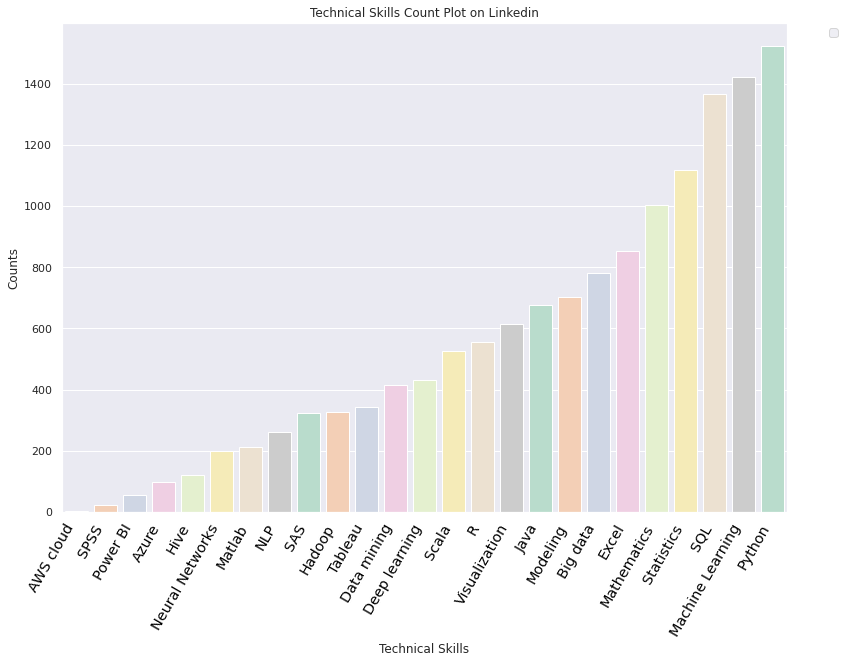

In [23]:
tech=pd.DataFrame(columns=['Technical Skills','Counts'])
tech=tech.fillna(0)

tech['Technical Skills']=df_tech.columns
tech['Counts']=summarize(df_tech)
tech=tech.sort_values('Counts')
ax = sns.barplot(x="Technical Skills", y="Counts", data=tech , palette = 'Pastel2')
ax.set_title('Technical Skills Count Plot on Linkedin')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(13,9)})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Soft Skills Count Plot on Linkedin

No handles with labels found to put in legend.


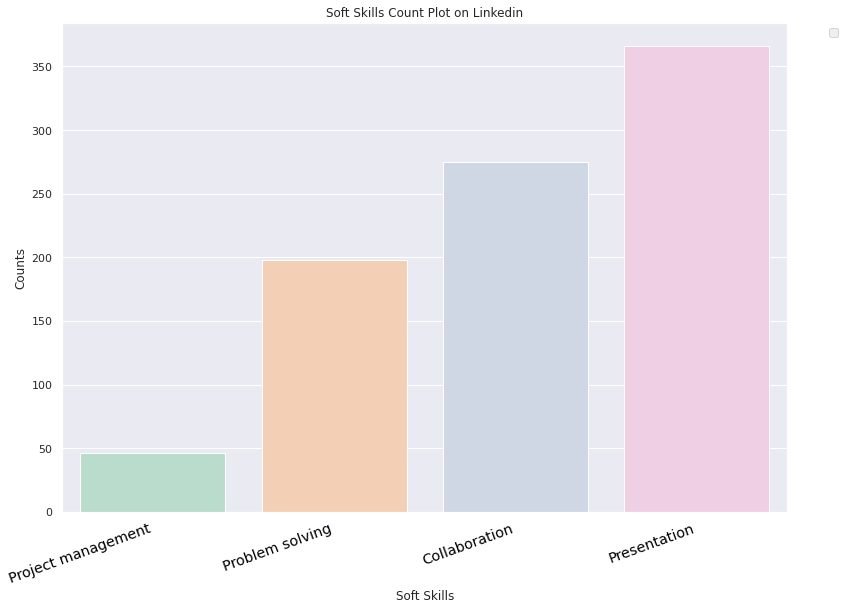

In [24]:
soft=pd.DataFrame(columns=['Soft Skills','Counts'])
soft=soft.fillna(0)

soft['Soft Skills']=df_soft.columns
soft['Counts']=summarize(df_soft)
soft=soft.sort_values('Counts')
ax = sns.barplot(x="Soft Skills", y="Counts", data=soft , palette = 'Pastel2')
ax.set_title('Soft Skills Count Plot on Linkedin')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=20, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,4)})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

## 2.3 Hierarchical clustering

### Hierarchical clustering on Technical Skills

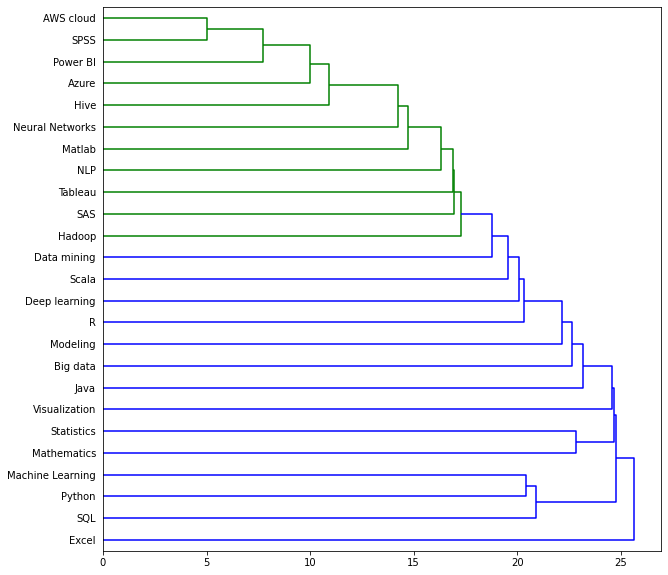

In [16]:
X_tech = df_tech.values
skill_linkedin = df_tech.columns.values
fig, ax = plt.subplots(1,1, figsize=(10, 10))
z = linkage(X_tech.T)
dn = dendrogram(z, orientation='right')
labels =skill_linkedin[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

### Hierarchical clustering on Soft Skills

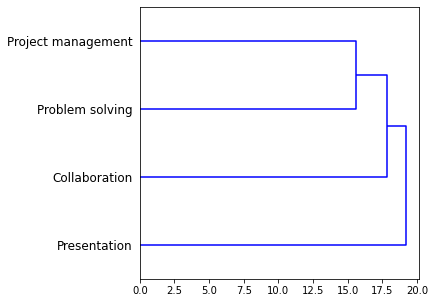

In [17]:
X_soft = df_soft.values
skill_linkedin = df_soft.columns.values
fig, ax = plt.subplots(1,1, figsize=(5, 5))
z = linkage(X_soft.T)
dn = dendrogram(z, orientation='right')
labels =skill_linkedin[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

#### Conclusion:

Using Hierarchical clustering , there are two categories for technical skills. The first category (in blue) consists mainly of useful tools and general techniques including data mining, modelling, visualization, etc. And to be specific, the useful tools include Python, R, Java, Scala and Excel. The second group (in another color) consists of specific skills such as NLP and Neural Networks, which are very important skills in Deep Learning. And visualization tools like Tableau and Power BI are also included in the second group. 

- According to the clustering result, combined with the result shown on the technical skill count plot, we decided to design the course curriculum based on the most popular skills in two different categories. 

- The most popular eight technical skills in the first category (in blue): Python, Machine Learning, SQL, Statistics, Mathematics, Excel, Big Data,Modelling
The most popular six technical skills in the second category(in another color): Tableau, Hadoop, SAS, NLP, Matlab, Neural Networks

- Since Excel is a very basic and easy analysis tool, most of the students who will take this course know how to use it. Thus we would not consider it to be one of the courses.
And since Python is the most popular programming tool according to the web scraping analysis, we would not consider other similar programming tools such as Matlab and SAS for this course.

- There is only one category for soft skills.

Therefore, the topics we might consider include: Machine Learning, Statistical and Mathematical Modelling, Big Data, NLP, Neural Networks. The tools we would consider are  Python and Tableau which are the top 2 popular tools. And since SQL is the most popular database, we may also introduce it in the course.


## 3. Web Scraping and Visualization on Indeed

## 3.1 Web Scraping for Data Scientist

### Define Skill List

In [27]:
# skills = ['Statistics', 'Data Mining', 'Machine Learning', 'SQL',
#        'Data mining Frameworks', 'R ', 'Engineering', 'Programming',
#        'Algorithms', 'Data Science', 'Product Development',
#        'Operations Research', 'Business Intelligence', 'Data Visualization',
#        'Business Intelligence Tools', 'Data Sources', 'Intelligence',
#        'JAVA', 'Scala', 'Unstructured Data', 'BSC', 'Tableau', 'Hadoop',
#        'Analytical Mind', 'Business Acumen', 'Computer Science', 'Python',
#        'Data Products', 'Visualization', 'Recommendation',
#        'Fraud', 'Fraud Detection', 'Classifiers', 'Ad-Hoc', 'Third Party',
#        'Data Collection', 'Anomaly Detection', 'WEKA', 'Numpy', 'Matlab',
#        'Visualisation', 'D3.Js', 'Ensemble', 'Nosql',
#        'Databases', 'Mongodb', 'Hbase', 'Currently Scripting',
#        'Programming Languages', 'Primary Focus', 'Business Insights',
#        'Highly Analytical', 'Interpreting Data', 'Communication',
#        'Problem-Solving', 'Research', 'High Quality', 'Integrity',
#        'Communication Skills', 'Organization', 'Critical Thinking',
#        'Passion', ' Collaborate', 'Presentation', 'Excellent Communication',
#        'Presentation Skills']

### Get Indeed urls

In [28]:
# # this the url for indeed search page
# url_indeed = "https://ca.indeed.com/Data-scientist-jobs-in-Canada"
# html = requests.get(url_indeed).text
# soup = BeautifulSoup(html, 'lxml')
# # decide how many pages we want to scrap
# pages = int(soup.find('div', {'id':'searchCount'}).text.split()[3])
# pages = min(100, pages)

In [29]:
# # generate the url for every search result page
# base_url = "https://ca.indeed.com/jobs?q=Data+scientist&l=Canada&start="
# pages_url = []
# for i in range(pages):
#   pages_url.append(base_url + str(i))

### Get Job Information

In [30]:
# # for every job, store the webpage content
# job_contents = []
# for page_url in pages_url:
#   page_context = requests.get(page_url).text
#   soup = BeautifulSoup(page_context, 'lxml')
#   results = soup.find_all('h2',{'class': 'title'})

#   for job in results:
#     job_link = "https://www.indeed.ca" + job.find('a')['href']
#     job_page = requests.get(job_link)
#     job_content = job_page.text
#     job_contents.append(job_content)

###  Match Skill Keywords

In [31]:
# # for every job, match webpage content with pre-defined keywords
# indeed_dict = {}
# id = 0
# for job_content in job_contents:
#   id += 1
#   job_soup = BeautifulSoup(job_content, 'lxml')
#   indeed_dict[id] = {}
#   print(id)
#   indeed_dict[id]['title'] = job_soup.find('h1', {'class':"icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title"}).text
#   indeed_dict[id]['company'] = job_soup.find('div', {'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'}).text
#   job_description = job_soup.text
#   for skill in skills:
#     if skill in job_description:
#       indeed_dict[id][skill] = 1

In [32]:
# # save the result in a dataframe
# indeed_df = pd.DataFrame(indeed_dict).T
# indeed_df.fillna(value=0, inplace=True)
# indeed_df.to_csv('indeed_web_scraping.csv')

## 3.2 Data Visualization

In [33]:
# instead of above steps, read the indeed web scraping result from local csv file
indeed_df = pd.read_csv('indeed_web_scraping.csv')

In [34]:
indeed_df.head()

,Unnamed: 0,title,company,SQL,R,Tableau,Hadoop,Computer Science,Python,Data Science,...,Algorithms,Databases,Business Acumen,Product Development,Hbase,Integrity,Visualisation,JAVA,Presentation,Communication Skills
0,0,Data Scientist,exactEarth Ltd.,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Senior Data Scientist,Sun Life Financial,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist - NLP,Chata Technologies Inc,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist,Seaspan Ship Management Ltd.,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"Specialist System Design, Data Scientist Machi...",Canadian National Railway,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
skills_indeed = indeed_df.sum()[3:].sort_values(ascending=False).rename_axis('Skills').reset_index(name='counts')

### The Top 20 Skills with Highest Frequency

No handles with labels found to put in legend.


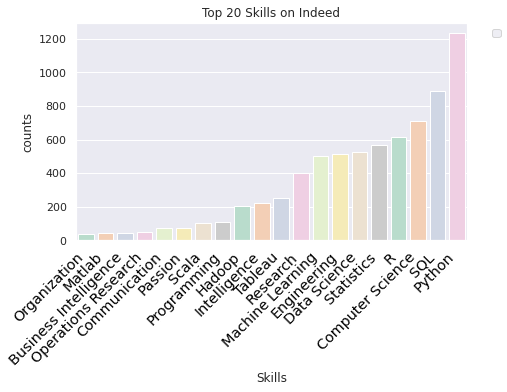

In [36]:
# choose the top 20 skills with highest frequency
top_indeed=skills_indeed[0:20]
top_indeed=top_indeed.sort_values('counts')
# Exploratory Data Analysis
ax = sns.barplot(x="Skills", y="counts", data=top_indeed , palette = 'Pastel2')
ax.set_title('Top 20 Skills on Indeed')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
    color = 'black')
sns.set(rc={'figure.figsize':(10,8)})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conclusion:

By scraping the first 100 pages of Canada Data Science job posting on Indeed, we got 1500 samples of job description. All descriptions are mapped to a predefined list of skill keywords[1] to count the frequency of each skill. At last, the top 20 keywords with the highest frequency are visualized as the bar plot.

- The top 20 popular skills are Python, SQL, computer science, R, statistics, data science, engineering, machine learning, research, tableau, Artificial Intelligence, Hadoop, programming, communication, operations research, business intelligence, Matlab and organization. (frequency descending)

- Since MIE1624 is an Engineering course for Data Analysis and Machine Learning, it is reasonable to ignore business knowledge such as business intelligence. Also, the soft skills such as research and communication can be improved by assignments and group projects.  So we will focus on the technical skills suggested by web scraping.

Based on the original course structure, we recommend that the course material should cover SQL, R, Tableau and Hadoop. 

*Note that considering a job is very likely to be posted on both Linkedin and Indeed, to avoid counting a job twice, the analysis of two websites is separated.

# Project 2. Program curriculum design

## 1. Web scrapping

Before designing the MDSAI program for the University of Toronto, this report first investigated the structure and courses of similar programs related to data science and business management at other Canadian universities. We select four master programs: 
- UBC - Master of Data Science
- York - Master of management in artificial intelligence
- Queen - Master of Management Analytics
- Ryerson - Master of Data Science and Analytics. 

In [37]:
# headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}

### 1.1 Queens - Master of Management Analytics

In [38]:
# queens_mma_url = "https://smith.queensu.ca/grad_studies/mma/program/mma-toronto/curriculum.php"
# response = requests.get(queens_mma_url, headers=headers)
# soup = BeautifulSoup(response.content, "lxml")

In [39]:
# courses = soup.find_all("div", {"class": "card"})

In [40]:
# course_names = []
# course_descriptions = []
# for course in courses:
#     course_name = course.find("h5", {"class": "mb-0"})
#     course_names.append(course_name.string.strip())
#     course_description = course.find("div", {"class": "card-body"})
#     course_descriptions.append(course_description.get_text().replace("\n", " ").strip())

In [41]:
# courses[0].find("div", {"class": "card-body"}).get_text().replace("\n", " ").strip()

In [42]:
# queens_mma_df = pd.DataFrame({"course name": course_names, "course description": course_descriptions})

In [43]:
# queens_mma_df.to_csv("queens_mma_df.csv", index=False)

### 1.2 Ryerson - Data Science and Analytics

In [44]:
# ryerson_ds_url = "https://www.ryerson.ca/graduate/calendar/programs-and-courses/data-science-analytics/"
# response = requests.get(ryerson_ds_url, headers=headers)
# soup = BeautifulSoup(response.content, "lxml")

In [45]:
# courses = soup.find("div", {"id": "accordion-content-1600179577063-course-listings"}).find_all("p")

In [46]:
# course_names = []
# course_descriptions = []
# for course in courses[1:-1]:
#     course_name = course.find("strong").get_text().strip()
#     course_names.append(course_name)
#     course_description = course.get_text()[len(course_name):]
#     course_descriptions.append(course_description.strip())

In [47]:
# ryerson_ds_df = pd.DataFrame({"course name": course_names, "course description": course_descriptions})

In [48]:
# ryerson_ds_df.tail()

In [49]:
# ryerson_ds_df.to_csv("ryerson_ds_df.csv", index=False)

### 1.3 UBC - Data Science

In [50]:
# ubc_ds_url = "https://masterdatascience.ubc.ca/programs/vancouver"
# response = requests.get(ubc_ds_url, headers=headers)
# soup = BeautifulSoup(response.content, "lxml")

In [51]:
# courses = soup.find_all("div", {"class": "views-field views-field-nothing course-details"})

In [52]:
# soup.find_all("div")

In [53]:
# course_names = []
# course_descriptions = []
# for course in courses:
#     section = course.find("p").get_text().split("\n")
#     course_name = section[0]
#     course_names.append(course_name)
#     course_description = section[1]
#     course_descriptions.append(course_description.strip())

In [54]:
# ubc_ds_df = pd.DataFrame({"course name": course_names, "course description": course_descriptions})

In [55]:
# ubc_ds_df.tail()

In [56]:
# ubc_ds_df.to_csv("ubc_ds_df.csv", index=False)

### 1.4 York (Schulich) - MMA

In [57]:
# york_url = "https://schulich.yorku.ca/programs/mmai/"
# response = requests.get(york_url, headers=headers)
# soup = BeautifulSoup(response.content, "lxml")

In [58]:
# course_lists = soup.find_all("ul", {"class": "course-list"})

In [59]:
# course_names = []
# course_descriptions = []
# for term in course_lists:
#     courses = term.find_all("li")
#     for course in courses:
#         course_name = course.find("a").next_sibling.strip()
#         course_names.append(course_name)
#         course_description = course.find("div", {"aria-role": "tabpanel"}).get_text()
#         course_descriptions.append(course_description.strip())

In [60]:
# york_df = pd.DataFrame({"course name": course_names, "course description": course_descriptions})

In [61]:
# york_df

In [62]:
# york_df.to_csv("york_df.csv", index=False)

In [63]:
queen = pd.read_csv("queens_mma_df.csv")
ryerson = pd.read_csv("ryerson_ds_df.csv")
ubc = pd.read_csv("ubc_ds_df.csv")
york = pd.read_csv("york_df.csv")

## 2.Clean four datasets

For each course program's dataset, we switch all words into lowercase and remove all punctuation. 

### 2.1 Queens - Master of Management Analytics

In [64]:
queen['course name'] = queen['course name'].str.lower()
queen['course description'] = queen['course description'].str.lower()
queen["course name"] = queen["course name"].apply(lambda x: x.replace('&', ''))
queen['school'] = 'queen'
queen.head(5)

,course name,course description,school
0,acquisition management of data,this course will focus on the data management ...,queen
1,ai ethics policy,this course explores the profound implications...,queen
2,analytical decision making,good managerial decisions depend on an underst...,queen
3,analytics for financial markets,this course provides a comprehensive overview ...,queen
4,analytics strategy change,this course covers the role strategy developme...,queen


### 2.2 Ryerson - Data Science and Analytics

In [65]:
ryerson["course name"]=ryerson["course name"].apply(lambda x: str(x)[7:])
ryerson["course name"]=ryerson["course name"].apply(lambda x: x.replace('–', ''))
ryerson['course name'] = ryerson['course name'].str.lower()
ryerson['course description'] = ryerson['course description'].str.lower()
ryerson['school'] = 'ryerson'
ryerson.head(5)

,course name,course description,school
0,design of algorithms and programming for mass...,"np-completeness, approximation algorithms and ...",ryerson
1,machine learning,overview of artificial learning systems. super...,ryerson
2,management of big data and big data tools,the course will discuss data management techni...,ryerson
3,data mining and prescriptive analytics,the course teaches to use data to recommend op...,ryerson
4,"soft skills, communication and ethics",the course will focus on communicating and pre...,ryerson


### 2.3 UBC - Data Science

In [66]:
ubc['course name'] = ubc['course name'].str.lower()
ubc['course description'] = ubc['course description'].str.lower()
ubc['school'] = 'ubc'
ubc.head(5)

,course name,course description,school
0,programming for data science,program design and data manipulation with pyth...,ubc
1,computing platforms for data science,"how to install, maintain, and use the data sci...",ubc
2,programming for data manipulation,program design and data manipulation with r. o...,ubc
3,descriptive statistics and probability for dat...,fundamental concepts in probability including ...,ubc
4,data visualization i,exploratory data analysis. design of effective...,ubc


### 2.4 York (Schulich) - MMA

In [67]:
york['course name'] = york['course name'].str.lower()
york['course description'] = york['course description'].str.lower()
york['school'] = 'york'
york.head(5)

,course name,course description,school
0,artificial intelligence fundamentals,this course introduces students to the field o...,york
1,database fundamentals,database management systems are computer-based...,york
2,algorithms for business analysis,the course covers main approaches to design an...,york
3,case analysis and presentation skills,this course is designed to give students the o...,york
4,ethics and societal implications of artificial...,this course is intended for students with prof...,york


## 3. Merge four datasets

After cleaning all datasets, we merge the datasets into one dataframe, and remove all stopwords.

In [68]:
df = pd.concat([ryerson,york,ubc,queen],ignore_index=True)

In [69]:
tokenizer = RegexpTokenizer('[a-zA-z]+')

In [70]:
stop_words = stopwords.words("english")

# remove basic stop words:
df['course name']= df['course name'].apply(lambda x : ' '.join([word for word in tokenizer.tokenize(x) if word not in stop_words]))
df['course description']= df['course description'].apply(lambda x : ' '.join([word for word in tokenizer.tokenize(x) if word not in stop_words]))

# remove punctuations:
df['course name']= df['course name'].apply(lambda x : re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
df['course description']= df['course description'].apply(lambda x : re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

# remove word "Prerequisite","course","students"
df['course name']= df['course name'].apply(lambda x : ' '.join([word for word in tokenizer.tokenize(x) if word not in ['science']]))
df['course description']= df['course description'].apply(lambda x : ' '.join([word for word in tokenizer.tokenize(x) if word not in ['prerequisite','prerequisites','course','students']]))

In [71]:
df.head(50)

,course name,course description,school
0,design algorithms programming massive data,np completeness approximation algorithms paral...,ryerson
1,machine learning,overview artificial learning systems supervise...,ryerson
2,management big data big data tools,discuss data management techniques storing ana...,ryerson
3,data mining prescriptive analytics,teaches use data recommend optimum action achi...,ryerson
4,soft skills communication ethics,focus communicating presenting data analytics ...,ryerson
5,social media analytics,cover fundamental concepts tools social networ...,ryerson
6,advanced data visualization,overview data visualization basic visualizatio...,ryerson
7,nlp text mining,covers important topics text mining including ...,ryerson
8,special topics data analytics,consists lectures seminars readings covering l...,ryerson
9,interactive learning decision process,focuses topics related reinforcement learning ...,ryerson


In [72]:
df.to_csv("sum_course.csv")

## 4. Feature selection of course name using bi-grams

### 4.1 Generate single words and bi-grams for course name

In [73]:
# generate single words and bi-grams for course name:
name_list = []
for i in range(len(df)):
    vectorizer = CountVectorizer(ngram_range = (1,2)) 
    row = df.iloc[i]
    name = row['course name']
    X1 = vectorizer.fit_transform([name]) 
    features = (vectorizer.get_feature_names()) 
    name_list.extend(features)
print("\n\nFeatures : \n", name_list) 



Features : 
 ['algorithms', 'algorithms programming', 'data', 'design', 'design algorithms', 'massive', 'massive data', 'programming', 'programming massive', 'learning', 'machine', 'machine learning', 'big', 'big data', 'data', 'data big', 'data tools', 'management', 'management big', 'tools', 'analytics', 'data', 'data mining', 'mining', 'mining prescriptive', 'prescriptive', 'prescriptive analytics', 'communication', 'communication ethics', 'ethics', 'skills', 'skills communication', 'soft', 'soft skills', 'analytics', 'media', 'media analytics', 'social', 'social media', 'advanced', 'advanced data', 'data', 'data visualization', 'visualization', 'mining', 'nlp', 'nlp text', 'text', 'text mining', 'analytics', 'data', 'data analytics', 'special', 'special topics', 'topics', 'topics data', 'decision', 'decision process', 'interactive', 'interactive learning', 'learning', 'learning decision', 'process', 'bayesian', 'bayesian statistics', 'learning', 'machine', 'machine learning', 'st

### 4.2 Select the keywords for course name

In [74]:
counts = Counter(name_list)
print(counts)
len(counts)

Counter({'data': 17, 'learning': 11, 'analytics': 10, 'machine': 5, 'machine learning': 5, 'artificial': 5, 'artificial intelligence': 5, 'intelligence': 5, 'ii': 5, 'ethics': 4, 'skills': 4, 'business': 4, 'algorithms': 3, 'programming': 3, 'management': 3, 'mining': 3, 'data visualization': 3, 'visualization': 3, 'analysis': 3, 'applications': 3, 'modelling': 3, 'inference': 3, 'big': 2, 'big data': 2, 'communication': 2, 'advanced': 2, 'data analytics': 2, 'decision': 2, 'statistics': 2, 'deep': 2, 'deep learning': 2, 'fundamentals': 2, 'applications artificial': 2, 'business applications': 2, 'ai': 2, 'project': 2, 'change': 2, 'programming data': 2, 'computing': 2, 'computation': 2, 'inference computation': 2, 'statistical': 2, 'statistical inference': 2, 'supervised': 2, 'supervised learning': 2, 'regression': 2, 'introduction': 2, 'algorithms programming': 1, 'design': 1, 'design algorithms': 1, 'massive': 1, 'massive data': 1, 'programming massive': 1, 'data big': 1, 'data tool

239

In [75]:
for key, value in list(counts.items()):
     if (value >= 10) | (value == 1):
        counts.pop(key)
print(counts)
# shou dong shan 

Counter({'machine': 5, 'machine learning': 5, 'artificial': 5, 'artificial intelligence': 5, 'intelligence': 5, 'ii': 5, 'ethics': 4, 'skills': 4, 'business': 4, 'algorithms': 3, 'programming': 3, 'management': 3, 'mining': 3, 'data visualization': 3, 'visualization': 3, 'analysis': 3, 'applications': 3, 'modelling': 3, 'inference': 3, 'big': 2, 'big data': 2, 'communication': 2, 'advanced': 2, 'data analytics': 2, 'decision': 2, 'statistics': 2, 'deep': 2, 'deep learning': 2, 'fundamentals': 2, 'applications artificial': 2, 'business applications': 2, 'ai': 2, 'project': 2, 'change': 2, 'programming data': 2, 'computing': 2, 'computation': 2, 'inference computation': 2, 'statistical': 2, 'statistical inference': 2, 'supervised': 2, 'supervised learning': 2, 'regression': 2, 'introduction': 2})


In [76]:
name_key=list(counts.keys())

Keywords that generate from those programs are:

In [77]:
name_key

['algorithms',
 'programming',
 'machine',
 'machine learning',
 'big',
 'big data',
 'management',
 'mining',
 'communication',
 'ethics',
 'skills',
 'advanced',
 'data visualization',
 'visualization',
 'data analytics',
 'decision',
 'statistics',
 'deep',
 'deep learning',
 'artificial',
 'artificial intelligence',
 'fundamentals',
 'intelligence',
 'analysis',
 'business',
 'applications',
 'applications artificial',
 'business applications',
 'modelling',
 'ai',
 'project',
 'change',
 'ii',
 'programming data',
 'computing',
 'computation',
 'inference',
 'inference computation',
 'statistical',
 'statistical inference',
 'supervised',
 'supervised learning',
 'regression',
 'introduction']

### 4.3 Visualization of course name

<BarContainer object of 44 artists>

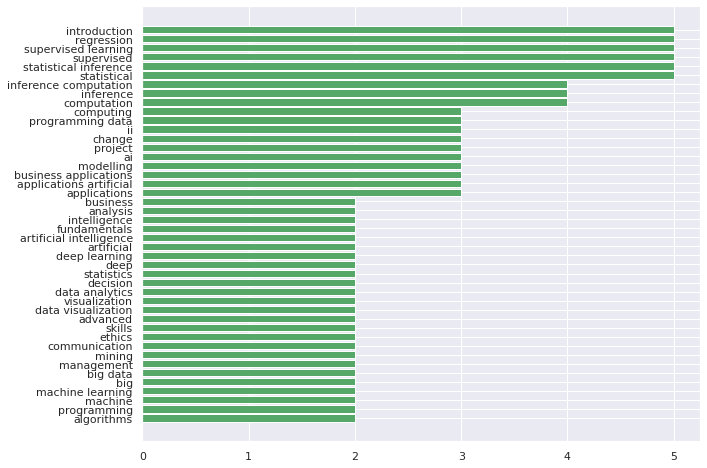

In [78]:
plt.figure(figsize=(10,8))
plt.barh(list(counts.keys()), sorted(counts.values()), color='g')

In [79]:
keyword_list = ["regression", "supervised learning", "inference", "computation", "programming", "modelling", "analysis", "aritificial intelligence", "deep learning", "statistics", "data science", "data visualization", "mining", "big data", "machine learning"]
df_original = pd.concat([ryerson,york,ubc,queen],ignore_index=True)
all_courses = list(df_original ['course name'])
proposed_courses = []
for i in range(len(all_courses)):
    for j in range(len(keyword_list)):
        if keyword_list[j] in all_courses[i]:
            proposed_courses.append(all_courses[i])
print(set(proposed_courses))



{'case analysis and presentation skills', 'data visualization i', 'data mining and prescriptive analytics', 'statistical inference and computation i', 'regression i', 'big data analytics', 'data science workflows', 'visual analytics and modelling', 'regression ii', 'statistical inference and computation ii', 'introduction to analytic modelling', 'machine learning  artificial intelligence', 'predictive modelling', 'algorithms for business analysis', 'machine learning non data science student', 'data visualization ii', 'deep learning', 'advanced data visualization', 'programming for data science', 'descriptive statistics and probability for data science', ' management of big data and big data tools', 'bayesian statistics and machine learning', 'advanced machine learning', 'supervised learning ii', 'special topics in data science and analytics', 'programming for data manipulation', ' machine learning', ' design of algorithms and programming for massive data', 'computing platforms for data

In [80]:
new_name_lst = pd.Series(name_list)[pd.Series(name_list).isin(pd.Series(name_key))]

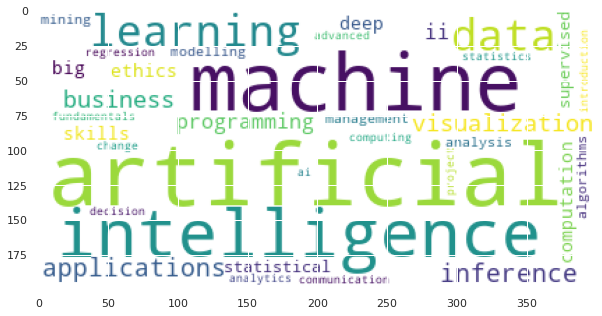

In [81]:
df1 = pd.DataFrame(new_name_lst.values)
text1 = ' '.join(df1[0])
wordcloud1 = WordCloud(background_color="white").generate(text1)
# Generate plot
plt.imshow(wordcloud1)
plt.show()

#### Main course: 
'algorithms','programming','machine learning','big data','management','artificial intelligence','data visualization','statistics','data science' <br>
#### Elective course:
'ethics','communication', 'deep learning', 'project', 'statistical inference', 'supervised learning',
'regression'

## 5. Feature selection for course description using bi-grams

### 5.1 generate single words and bi-grams use TFIDF for course description:

In [82]:
description_list = []
for i in range(len(df)):
    vectorizer = TfidfVectorizer(ngram_range = (2,2),max_features=200) 
    row = df.iloc[i]
    description = row['course description']
    X2 = vectorizer.fit_transform([description]) 
    features = (vectorizer.get_feature_names()) 
    description_list.extend(features) 
print("\n\nFeatures : \n", description_list)



Features : 
 ['acquire process', 'advanced data', 'algebraic algorithms', 'algorithmic techniques', 'algorithms acquire', 'algorithms algebraic', 'algorithms analysis', 'algorithms complexity', 'algorithms parallel', 'algorithms study', 'amounts data', 'analysis complexity', 'analysis massively', 'analysis web', 'approximation algorithms', 'classes modeling', 'completeness approximation', 'complexity analysis', 'complexity classes', 'crawls credit', 'data advanced', 'data introduction', 'data structures', 'design algorithms', 'dimensional data', 'facilitate analysis', 'frameworks facilitate', 'graph algorithms', 'information retrieval', 'introduce theory', 'introduction information', 'large amounts', 'large dimensional', 'massively large', 'modeling frameworks', 'np completeness', 'parallel algorithms', 'process large', 'retrieval streaming', 'searches crawls', 'streaming algorithms', 'structures graph', 'study algorithmic', 'techniques introduce', 'theory design', 'web searches', 'a

### 5.2 Select keywords for course description

In [83]:
des_counts = Counter(description_list)
len(des_counts)

2199

In [84]:
for key, value in list(des_counts.items()):
     if (value >= 6) | (value <= 2):
        des_counts.pop(key)
print(des_counts)
len(des_counts)

Counter({'data science': 5, 'decision making': 5, 'data analysis': 5, 'artificial intelligence': 5, 'sentiment analysis': 4, 'social network': 4, 'case studies': 4, 'big data': 3, 'dimensionality reduction': 3, 'data driven': 3, 'products services': 3, 'data visualization': 3, 'exploratory data': 3, 'data topics': 3, 'analysis design': 3, 'applications artificial': 3, 'business problems': 3, 'deep learning': 3, 'linear models': 3})


19

In [85]:
des_key=list(des_counts.keys())

In [86]:
des_key

['big data',
 'dimensionality reduction',
 'data driven',
 'products services',
 'data science',
 'sentiment analysis',
 'social network',
 'data visualization',
 'decision making',
 'data analysis',
 'exploratory data',
 'data topics',
 'artificial intelligence',
 'analysis design',
 'applications artificial',
 'case studies',
 'business problems',
 'deep learning',
 'linear models']

### 5.3 Visualization of course description

<BarContainer object of 19 artists>

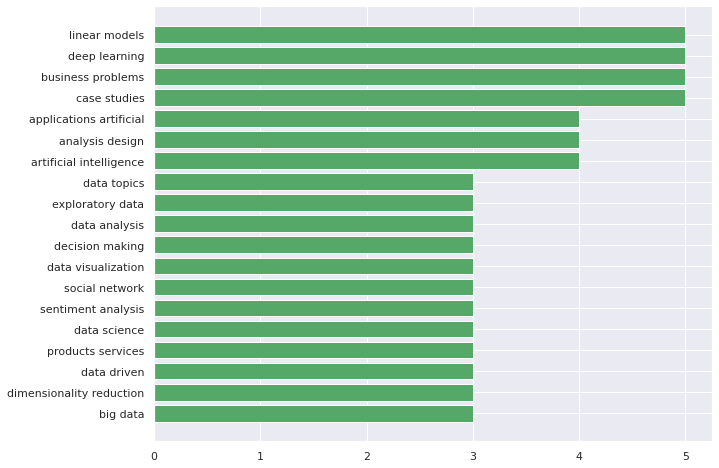

In [87]:
plt.figure(figsize=(10,8))
plt.barh(list(des_counts.keys()), sorted(des_counts.values()), color='g')

In [88]:
new_des_lst = pd.Series(description_list)[pd.Series(description_list).isin(pd.Series(des_key))]

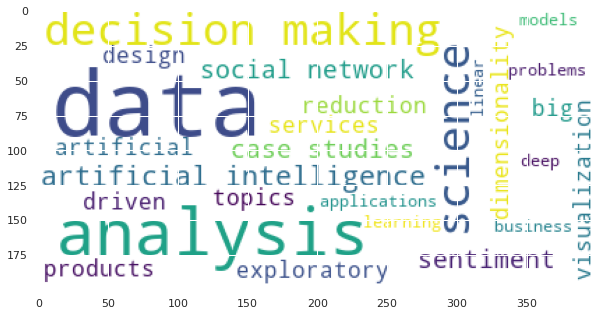

In [89]:
df2 = pd.DataFrame(new_des_lst.values)
text2 = ' '.join(df2[0])
wordcloud1 = WordCloud(background_color="white").generate(text2)
# Generate plot
plt.imshow(wordcloud1)
plt.show()

#### Main course description terms:  
big data','dimensionality reduction','data driven','data science','sentiment analysis','social network','data visualization','decision making','data analysis','exploratory data','artificial intelligence','case studies',
'business problems','deep learning','linear models'

## 6. Identifying skills

Our team will continue to use the 2019 Kaggle survey data and use a Venn diagram to illustrate the top three most common programming languages used by business analysts, data analysts, data scientists, or data engineers. 

In [10]:
kaggle1 = pd.read_csv('clean_kaggle_data.csv')
kaggle2 = kaggle1[(kaggle1['Q5'] == 'Business Analyst') 
                  | (kaggle1['Q5'] == 'Data Analyst') 
                  | (kaggle1['Q5'] == 'Data Scientist')
                  | (kaggle1['Q5'] == 'Data Engineer')]

### Venn Diagram

In [11]:
#Define a venn diagram
def Venn_Diagram(df,columns):
    # Subset count
    label = df[columns].mode().values[0]
    subsets = (
        len(df[(df[columns[0]] == label[0]) & (df[columns[1]] != label[1]) & (df[columns[2]] != label[2])]), #A
        len(df[(df[columns[0]] != label[0]) & (df[columns[1]] == label[1]) & (df[columns[2]] != label[2])]), #B
        len(df[(df[columns[0]] == label[0]) & (df[columns[1]] == label[1]) & (df[columns[2]] != label[2])]), #A.B
        len(df[(df[columns[0]] != label[0]) & (df[columns[1]] != label[1]) & (df[columns[2]] == label[2])]), #C
        len(df[(df[columns[0]] == label[0]) & (df[columns[1]] != label[1]) & (df[columns[2]] == label[2])]), #A.C
        len(df[(df[columns[0]] != label[0]) & (df[columns[1]] == label[1]) & (df[columns[2]] == label[2])]), #B.C
        len(df[(df[columns[0]] == label[0]) & (df[columns[1]] == label[1]) & (df[columns[2]] == label[2])]), #A.B.C
             )
    v = venn3(subsets = subsets, set_labels= label)
    c = venn3_circles(subsets = subsets, linestyle='dashed', linewidth=1, color="grey")
    return v,c

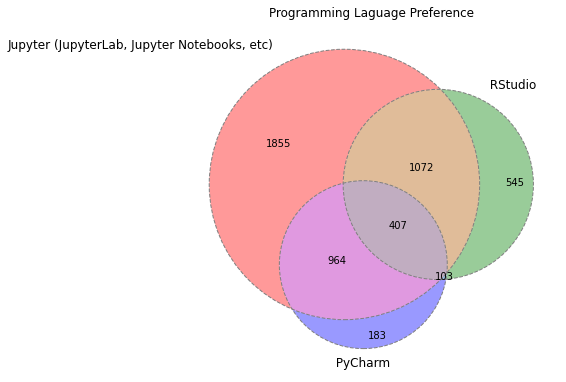

In [12]:
columns = ['Q16_Part_1','Q16_Part_2','Q16_Part_3']
filter_label = ['Business Analyst', 'Data Scientist', 'Data Analyst','Data Engineer']
plt.figure(figsize = (14,10))
gs = gridspec.GridSpec(3,3)

# Make Venn diagram
ax = plt.subplot(gs[0:2,:])
Venn_Diagram(kaggle2, columns)
plt.title("Programming Laguage Preference")
plt.savefig('language.png')

According to the Venn diagram illustrated above, our team has several findings:
- Python and R are the three primary languages used by people who are in the data science industry
- Majority of people prefer to use Jupyter than R studio and PyCharm
- The number of people who prefer to use all three tools (Jupyter, R studio, and Pycharm) are similar to the people who only like to use R studio

**Conclusion:**<br>
Python or R will be mainly used for most data science and statistical courses in our designed MDSAI program.

In [93]:
#code in project 1
def summarize(df):
    l = []
    for col in df:
        l.append(df[col].sum())
    return l

In [94]:
linkedin=pd.read_csv("skills_linkedin.csv")

In [95]:
linkedin.columns=['Index','Link','Job Title','Company Name','Python','R','Excel','Java','Scala','Matlab','SAS', 'SQL','SPSS', 'Tableau', 'Power BI', 'Machine Learning','Modeling','Deep learning','Data mining', 'NLP','Neural Networks','Visualization','Big data',  'Hadoop', 'Hive','Azure','Mathematics','Statistics','AWS cloud', 
                   'Presentation','Problem solving','Collaboration','Project management' ]
linkedin1=linkedin[linkedin.columns[4:-1]]

In [96]:
linkedin["Python"].sum()

1522

In [97]:
link_null = pd.DataFrame(index = list(range(28)), columns = ['Language', 'Counts'])
#link_null = link_null.fillna(0)

In [98]:
len(linkedin1.columns)

28

In [99]:
link_null['Counts']=summarize(linkedin1)
link_null['Language'] = linkedin1.columns

<AxesSubplot:xlabel='Language'>

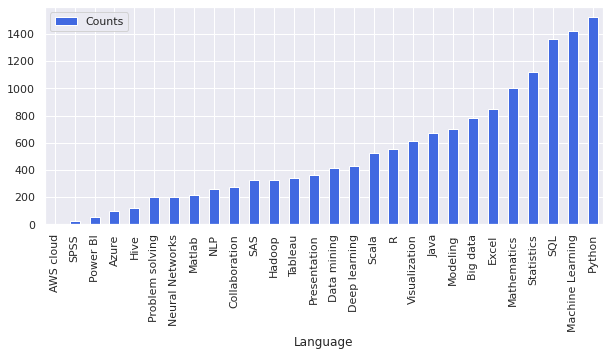

In [100]:
link_null=link_null.sort_values('Counts')
link_null.plot(x="Language",kind='bar', stacked=True,figsize=(10,4),color="royalblue")

The distribution above also shows that Python is the most popular programming languages today. According to this figure, our team decided to design the Data Science course into four parts: Machine Learning, Data Modeling, Big Data, and Statistics. Besides, we will include NLP, neural networks, and deep learning in artificial intelligence courses.

# Project 3. Course Recommender System

### Course Dataset

The dataset containing all elective courses is built by our group from information we collected from previous projects. We manually read the syllabus of all courses, and match the keywords to Area and Industry keywords to classify each course by their program, area and industry.

In [101]:
df_elective_course = pd.read_csv("analystic_elective_courses.csv")
df_elective_course.head()

,Title,Program,Area,Industry
0,APS 502H: Financial Engineering,none,BA,Finance
1,APS 1005H: Operations Research for Engineering...,none,DS,Management
2,APS 1017H: Supply Chain Management and Logistics,none,"BA, DA",Management
3,APS 1022H: Financial Engineering II,none,BA,Finance
4,APS 1040H: Quality Control for Engineering Man...,none,"BA, DA",Management


### HTML Raw Code for Designing the Course Recommender System

Please see the html file attached